# Comparison of precipitation from evaporation versus scaling from desalination

## Evaporation

Effluent module 1 CF: 1.1177571260302372

--> The ['Zn', 'Ni', 'Cu', 'Cd', 'Co', 'Pb'] elements are not accepted by the pitzer database

Estimated completion in 7 seconds: 2022-04-08 17:45:21.289350 local time.
run_time (s): 0.08887060000000702


<Figure size 1224x720 with 0 Axes>

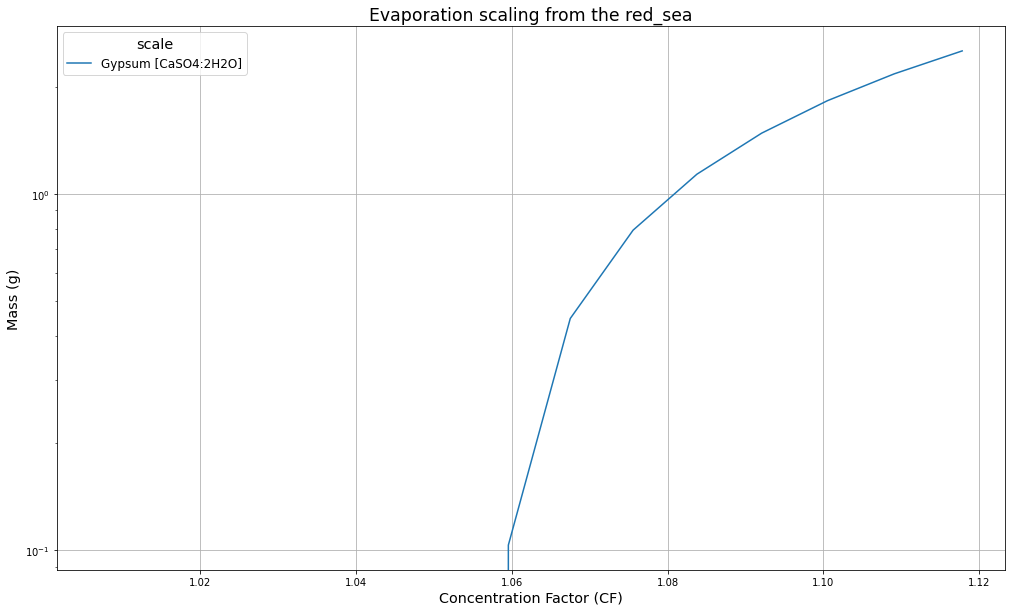

ionic masses
{'1.00707 (m)': {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}},
 '1.01425 (m)': {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}},
 '1.02152 (m)': {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}},
 '1.02891 (m)': {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}},
 '1.0364 (m)': {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}},
 '1.044 (m)': {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}},
 '1.05171 (m)': {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}},
 '1.05954 (m)': {'ion (g/m^2)': {'Ca': 0.026885299032741238,
                                 'H': 0.0013523014275693,
                                 'O': 0.05366393699092272,
                                 'S': 0.02150998336955057}},
 '1.06749 (m)': {'ion (g/m^2)': {'Ca': 0.11628190231500099,
                                 'H': 0.005848853766125161,
                                 'O': 0.23210248364422212,
                                 'S': 0.

In [7]:
%run ../../../rosspy/ro.py
# import rosspy

# initial parameters
database_selection = 'pitzer'
water_selection = 'red_sea'
simulation_type = 'evaporation'
simulation_time = 200
export_name = 'evaporation'

# create the input file
ross = ROSSPkg(database_selection, simulation_type = simulation_type, export_content = True, jupyter = True)
ross.reactive_transport(simulation_time)
ross.feed_geochemistry(water_selection)
ross.execute(export_name)

evaporation_data = ross.processed_data

## Desalination

Effluent module 1 CF: 1.1177571260302372

--> The ['Zn', 'Ni', 'Cu', 'Cd', 'Co', 'Pb'] elements are not accepted by the pitzer database

Estimated completion in 7 seconds: 2022-04-08 17:45:23.962098 local time.
run_time (s): 7.88868549999998
mineral Gypsum   {'formula': 'CaSO4:2H2O', 'mass': '170'}


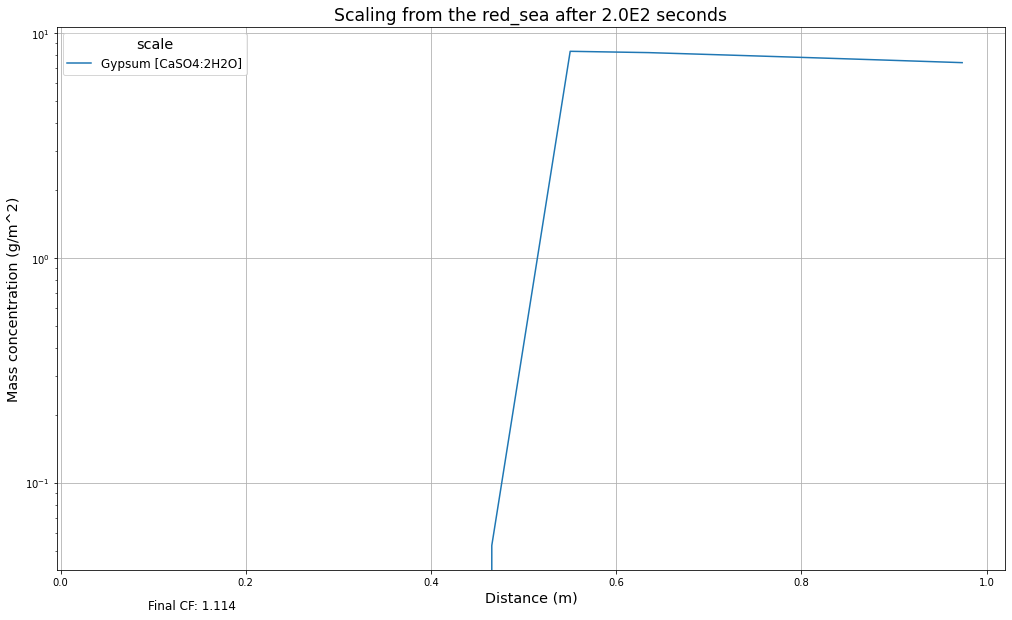

ionic masses
{'0.0423 (m)': {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}},
 '0.127 (m)': {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}},
 '0.212 (m)': {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}},
 '0.296 (m)': {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}},
 '0.381 (m)': {'ion (g/m^2)': {'Ca': 0.0, 'H': 0.0, 'O': 0.0, 'S': 0.0}},
 '0.466 (m)': {'ion (g/m^2)': {'Ca': 0.013701135499988713,
                               'H': 0.0006891522788491753,
                               'O': 0.027347914980602753,
                               'S': 0.01096179724055936}},
 '0.55 (m)': {'ion (g/m^2)': {'Ca': 2.1578638453492665,
                              'H': 0.10853821469541093,
                              'O': 4.307166875502901,
                              'S': 1.7264310644524232}},
 '0.635 (m)': {'ion (g/m^2)': {'Ca': 2.1292656498084925,
                               'H': 0.1070997564283633,
                               'O': 4.2500839

In [8]:
%run ../../../rosspy/ro.py

# initial parameters
database_selection = 'pitzer'
simulation_title = 'test'
water_selection = 'red_sea'
simulation_perspective = 'all_distance'
simulation_type = 'transport'
simulation_time = 200
export_name = 'desalination'

# create the input file
ross = ROSSPkg(database_selection, simulation_type = simulation_type, export_content = True, jupyter = True)
ross.reactive_transport(simulation_time, simulation_perspective)
ross.feed_geochemistry(water_selection)
ross.execute(export_name)

desalination_data = ross.processed_data

# Comparing the scaling predictions

In [6]:
import pandas
import re

# define the parameters of the system
active_sqr_meters_per_cell = 37/12
pore_volumes = 51/12

# convert the desalination data to grams
refined_desalination_data = pandas.DataFrame()
total_scale = 0
for column in desalination_data:
    for index, row in desalination_data.iterrows():
        refined_desalination_data.at[index, column] = float(row[column]) * active_sqr_meters_per_cell/pore_volumes
        total_scale += refined_desalination_data.at[index, column]
refined_desalination_data.rename(columns = {column: re.sub('(g/m\^2)', 'g',column)}, inplace = True)
refined_desalination_data.index.name = 'Distance (m)'

# sum the evaporation scaling
total_evaporation_scaling = 0
for column in evaporation_data:
    for index, row in evaporation_data.iterrows():
        total_evaporation_scaling += float(evaporation_data.at[index, column])
        
# contrast the desalination and evaporation data
print('refined_desalination_data\n', total_scale, 'total g scale')
display(refined_desalination_data)
print('\n\nevaporation_data\n', total_evaporation_scaling, 'total g scale')
display(evaporation_data)

refined_desalination_data
 34.31764509803922 total g scale


<>:15: DeprecationWarning: invalid escape sequence \^
<>:15: DeprecationWarning: invalid escape sequence \^
<>:15: DeprecationWarning: invalid escape sequence \^
<ipython-input-6-acac1a8a7d5f>:15: DeprecationWarning: invalid escape sequence \^
  refined_desalination_data.rename(columns = {column: re.sub('(g/m\^2)', 'g',column)}, inplace = True)


,Gypsum (g)
Distance (m),
4.23E-2,0.000000
1.27E-1,0.000000
2.12E-1,0.000000
2.96E-1,0.000000
3.81E-1,0.000000
4.66E-1,0.038233
5.50E-1,6.021569
6.35E-1,5.941765
7.20E-1,5.796667




evaporation_data
 10.482348077018017 total g scale


,Gypsum (g)
Concentration Factor (CF),
1.00707,0.000000
1.01425,0.000000
1.02152,0.000000
1.02891,0.000000
1.03640,0.000000
1.04400,0.000000
1.05171,0.000000
1.05954,0.103412
1.06749,0.447266
